In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df['Age'].fillna(np.mean(df.Age), inplace = True)

In [6]:
df.Sex.value_counts()

M    723
F    192
Name: Sex, dtype: int64

In [7]:
df['Sex'].fillna('M', inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df.head(3)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  40.0   M           ATA        140          289          0     Normal   
1  49.0   F           NAP        160          180          0     Normal   
2  37.0   M           ATA        130          283          0         ST   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0

In [12]:
encode = LabelEncoder()
df['Sex'] = encode.fit_transform(df['Sex'])
df.ChestPainType = encode.fit_transform(df.ChestPainType)
df.RestingECG = encode.fit_transform(df.RestingECG)
df.ExerciseAngina = encode.fit_transform(df.ExerciseAngina)
df.ST_Slope = encode.fit_transform(df.ST_Slope)

In [13]:
df.head(2)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  40.0    1              1        140          289          0           1   
1  49.0    0              2        160          180          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1

In [14]:
X = df.iloc[:, :-1]
y = df.HeartDisease

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [28]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

78.26086956521739

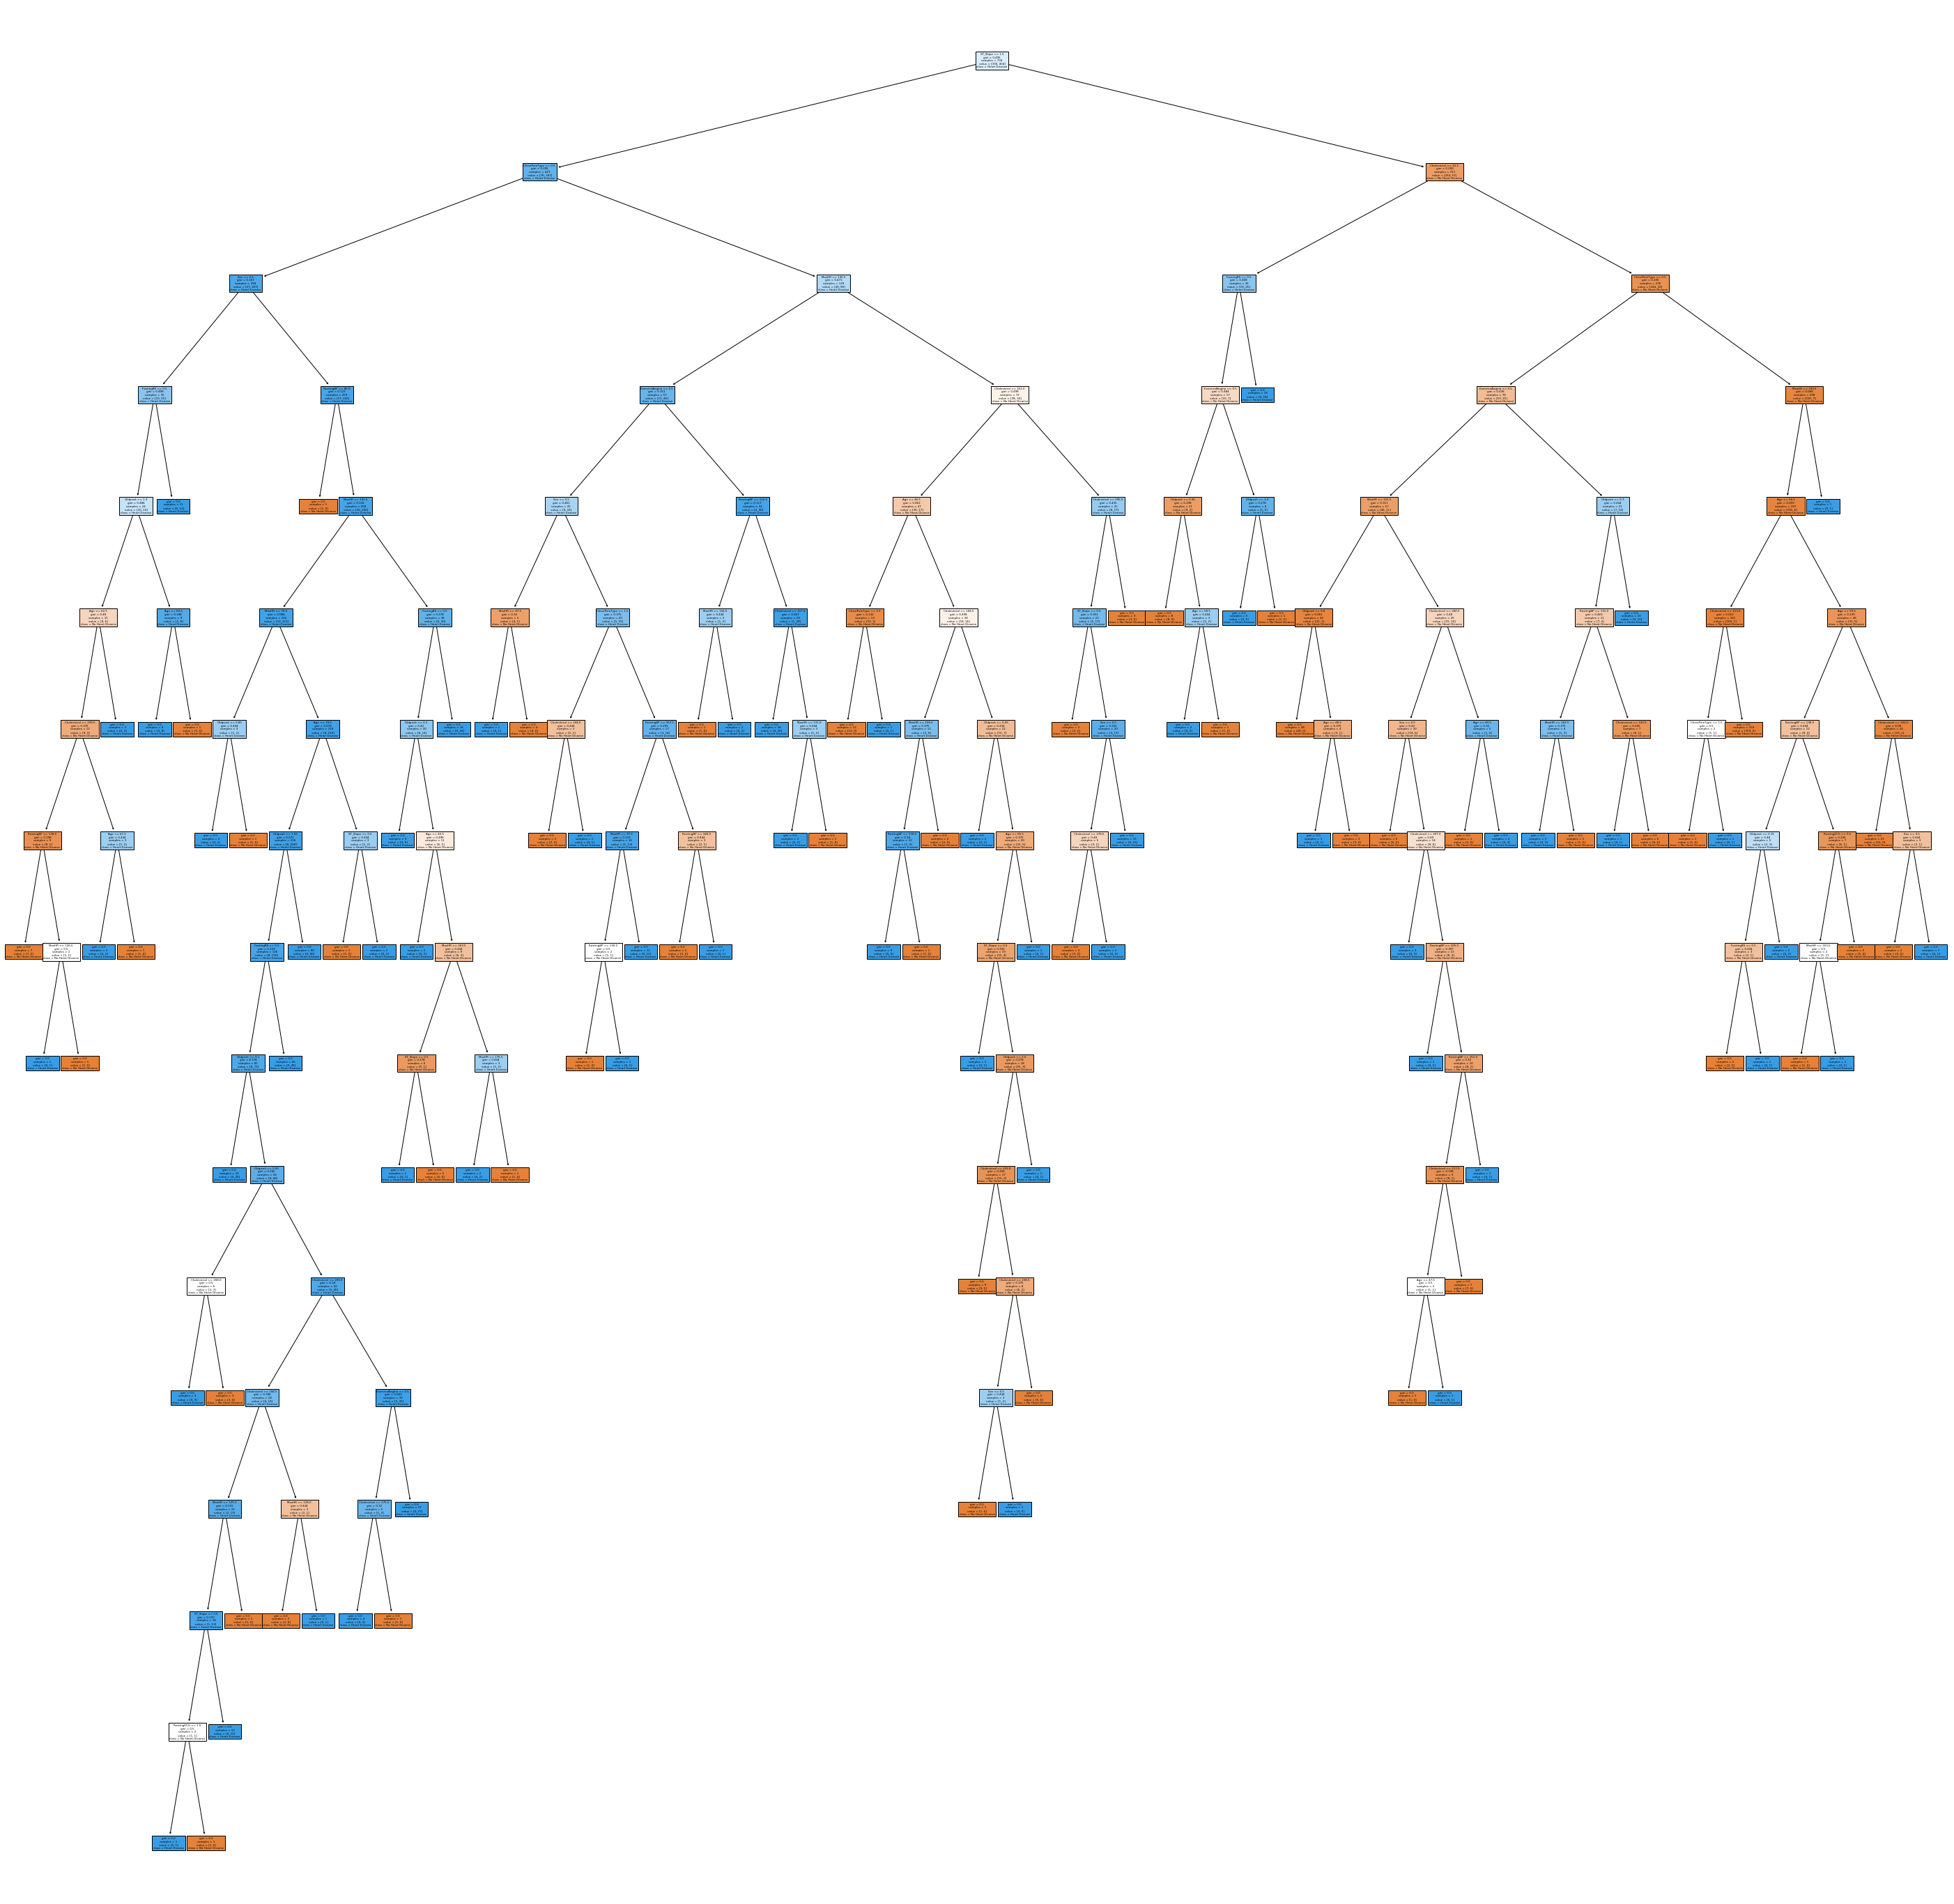

In [30]:
from sklearn import tree
fig = plt.figure(figsize=(50,50))
features = X.columns
classes = ['No Heart Disaese', 'Heart Disease']
tree.plot_tree(model, feature_names = features, class_names = classes, filled=True)
plt.show()

In [22]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [23]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

84.23913043478261

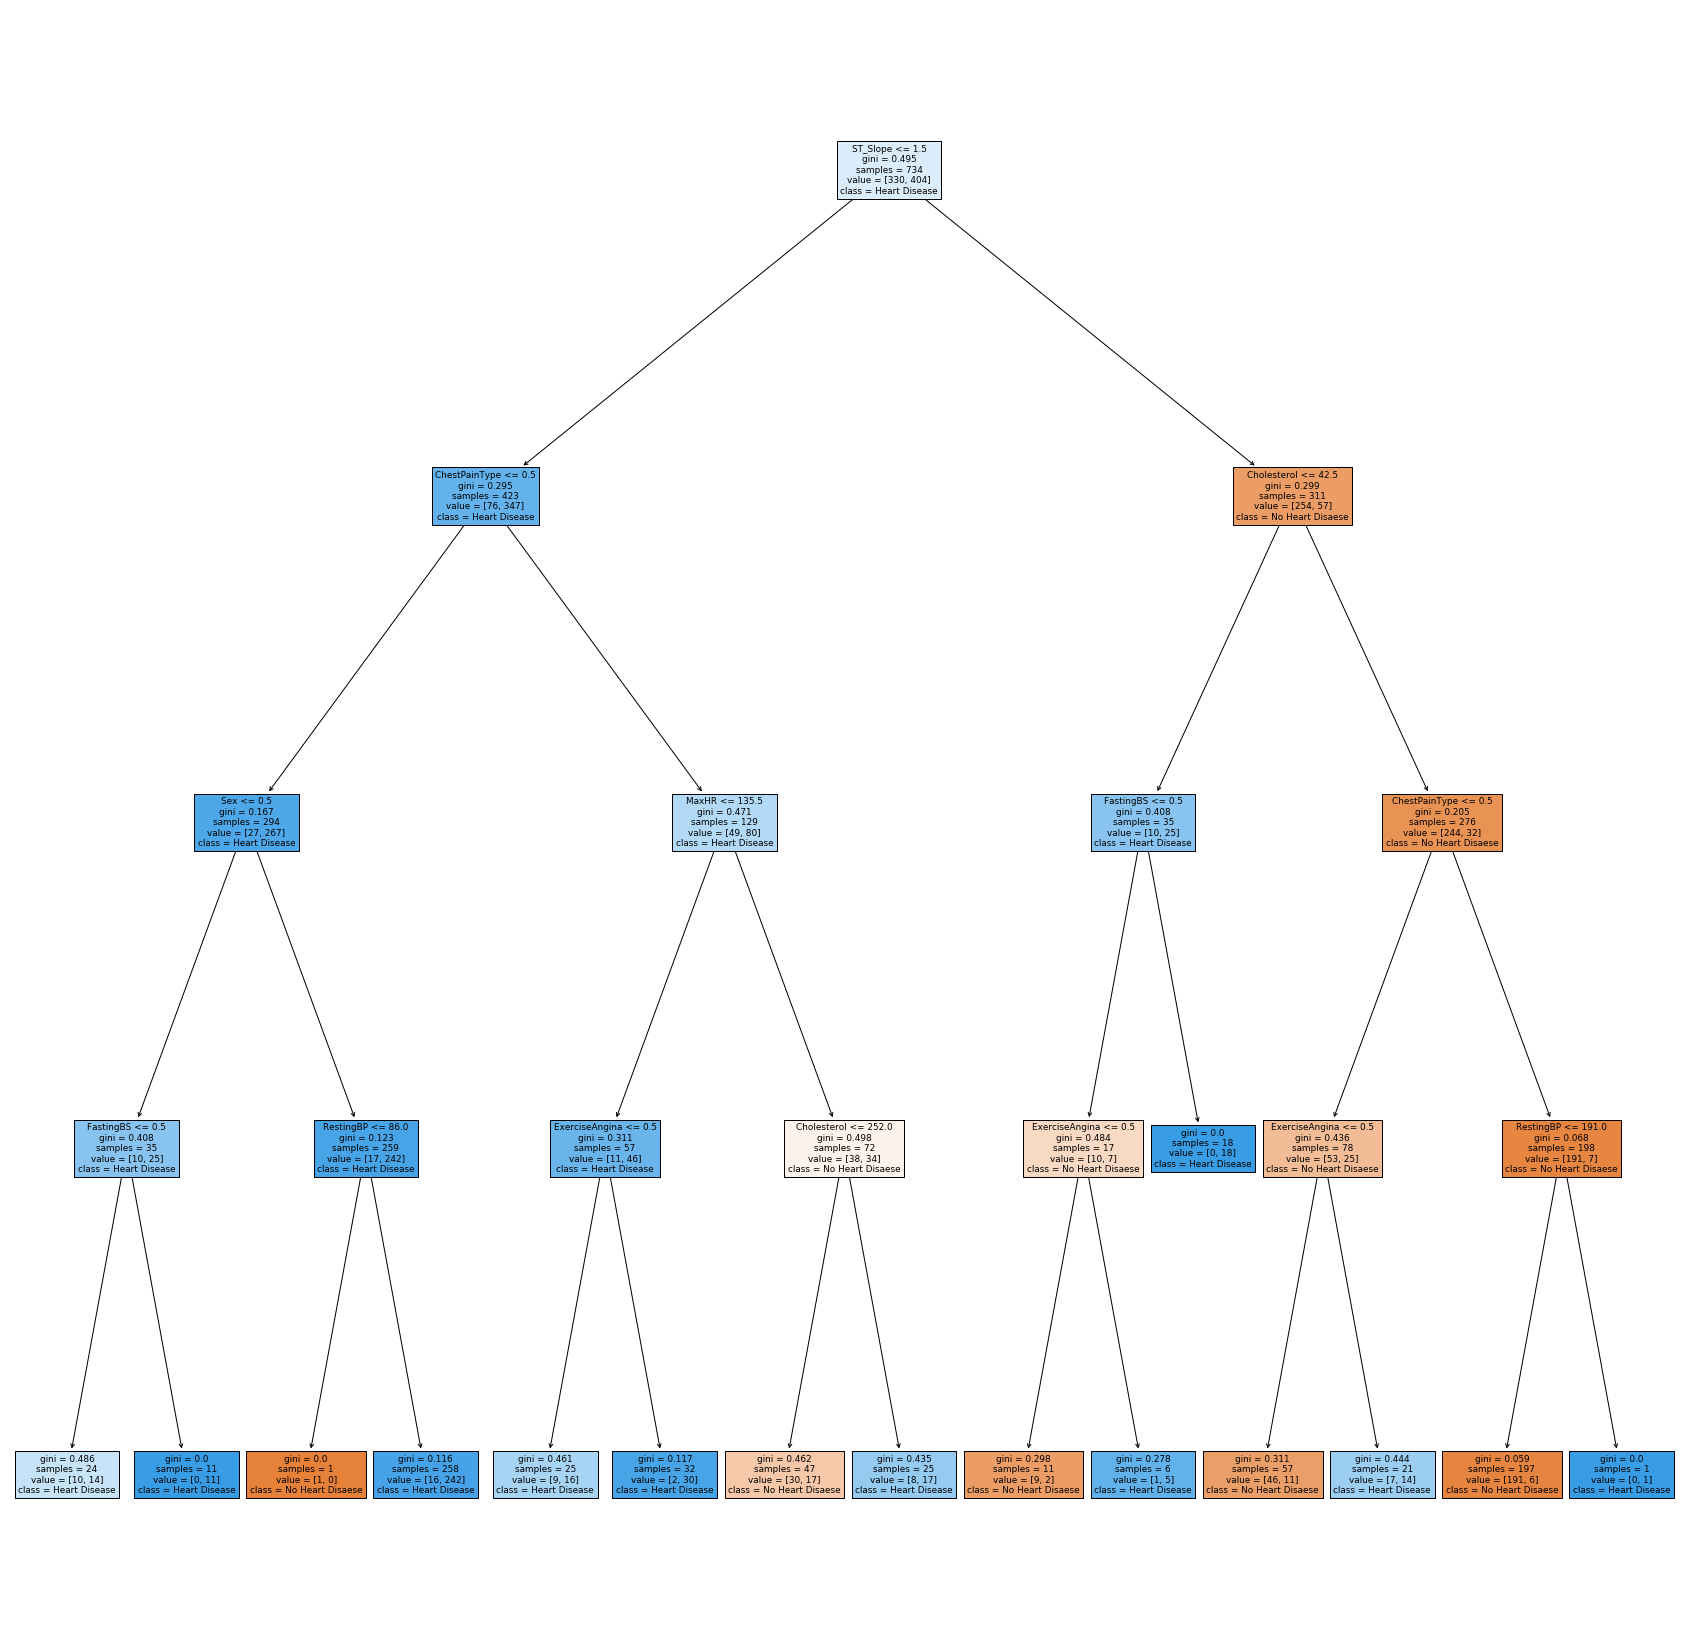

In [26]:
fig = plt.figure(figsize=(30,30))
features = X.columns
classes = ['No Heart Disaese', 'Heart Disease']
tree.plot_tree(model, feature_names = features, class_names = classes, filled=True)
plt.show()